<a href="https://colab.research.google.com/github/pp2098/Wine-Quality-Prediction/blob/main/CapstoneProject_ML_Binary_PoojaPandey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
**WINE QUALITY PREDICTION**



**Objective**

In [ ]:
#Prediction of Wine Quality by BINARY CLASSIFICATION APPROACH as GOOD quality(1) or BAD quality(0) wine using different ML Algorithm.
#ML Algorithms used LOGISTIC REGRESSION,DECISION TREE,RANDOM FOREST,K-NEAREST NEIGHBORS,SUPPORT VECTOR MACHINE.

**Importing Librabies**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

**Data Loading**

In [ ]:
wine_data=pd.read_csv('QualityPrediction.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Finding out the Rows and columns**

In [ ]:
wine_data.shape

(1599, 12)

**EDA/Preprocessing**

In [ ]:
#Finding the missing value in the given dataset
wine_data.isnull().sum()
#conclusion: There is no missing value in the dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#Statistical Measure of the given dataset
wine_data.describe()
#conclusion:There are many outliers present in the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Data Visualization**

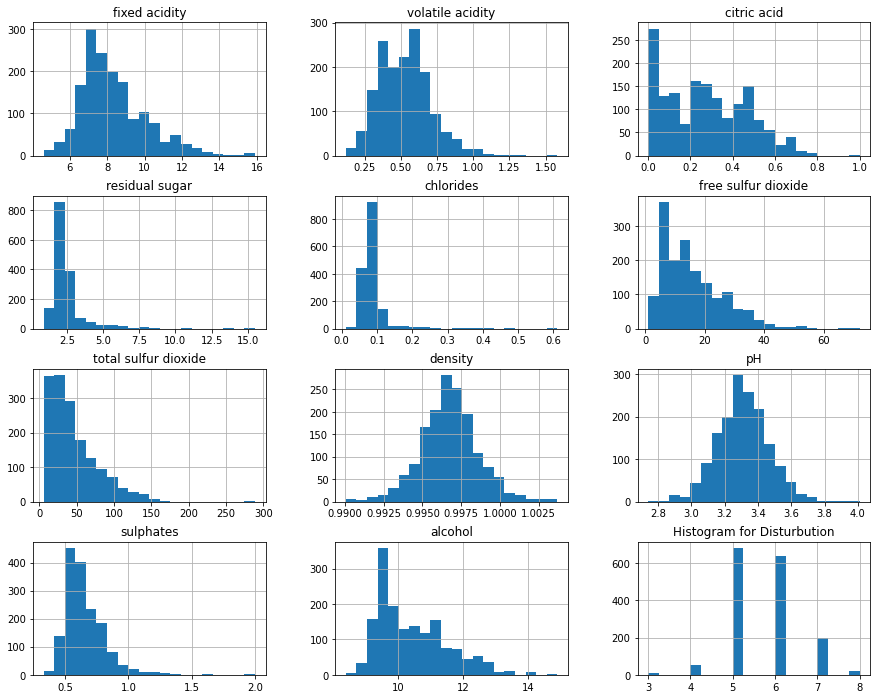

In [ ]:
#Histogram plot to see the disturbution of dataset
wine_data.hist(bins=20,figsize=(15,12))
plt.title("Histogram for Disturbution")
plt.show()
#conclusion:Skewness & Normal disturbution both are detected

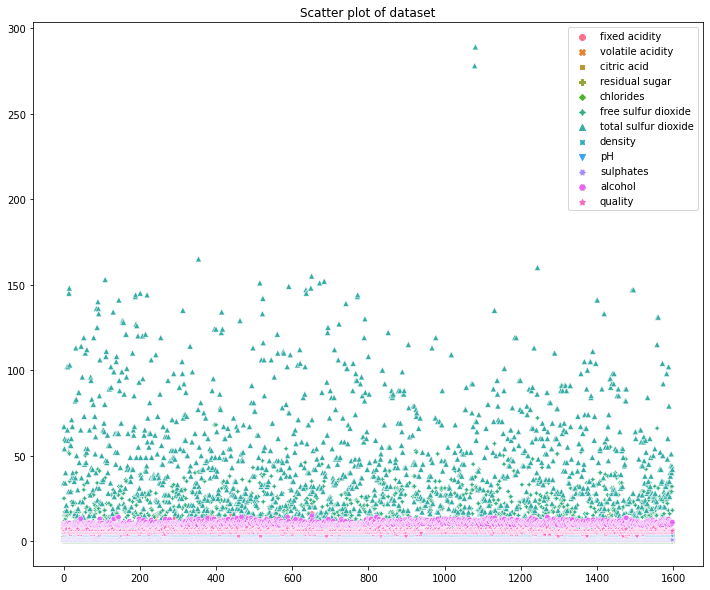

In [ ]:
#Data Visulaization by Scatter Plot
plt.figure(figsize=(12,10))
sns.scatterplot(data=wine_data)
plt.title("Scatter plot of dataset")
plt.show()


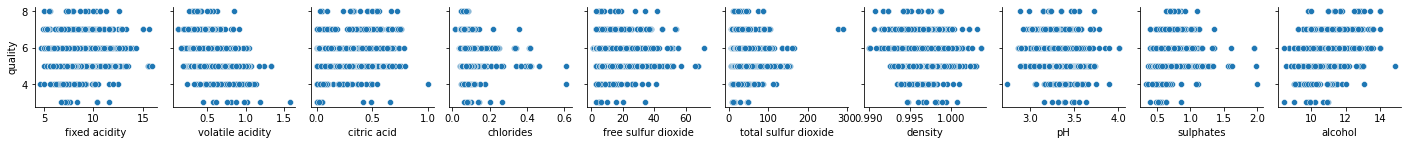

In [ ]:
#Scatter plot with respect to the target variable i.e., QUALITY
sns.pairplot(wine_data,x_vars=['fixed acidity','volatile acidity','citric acid','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'],y_vars= 'quality',size=2,kind='scatter',height=3.0)

Text(0.5, 0, 'Features & Target Variable')

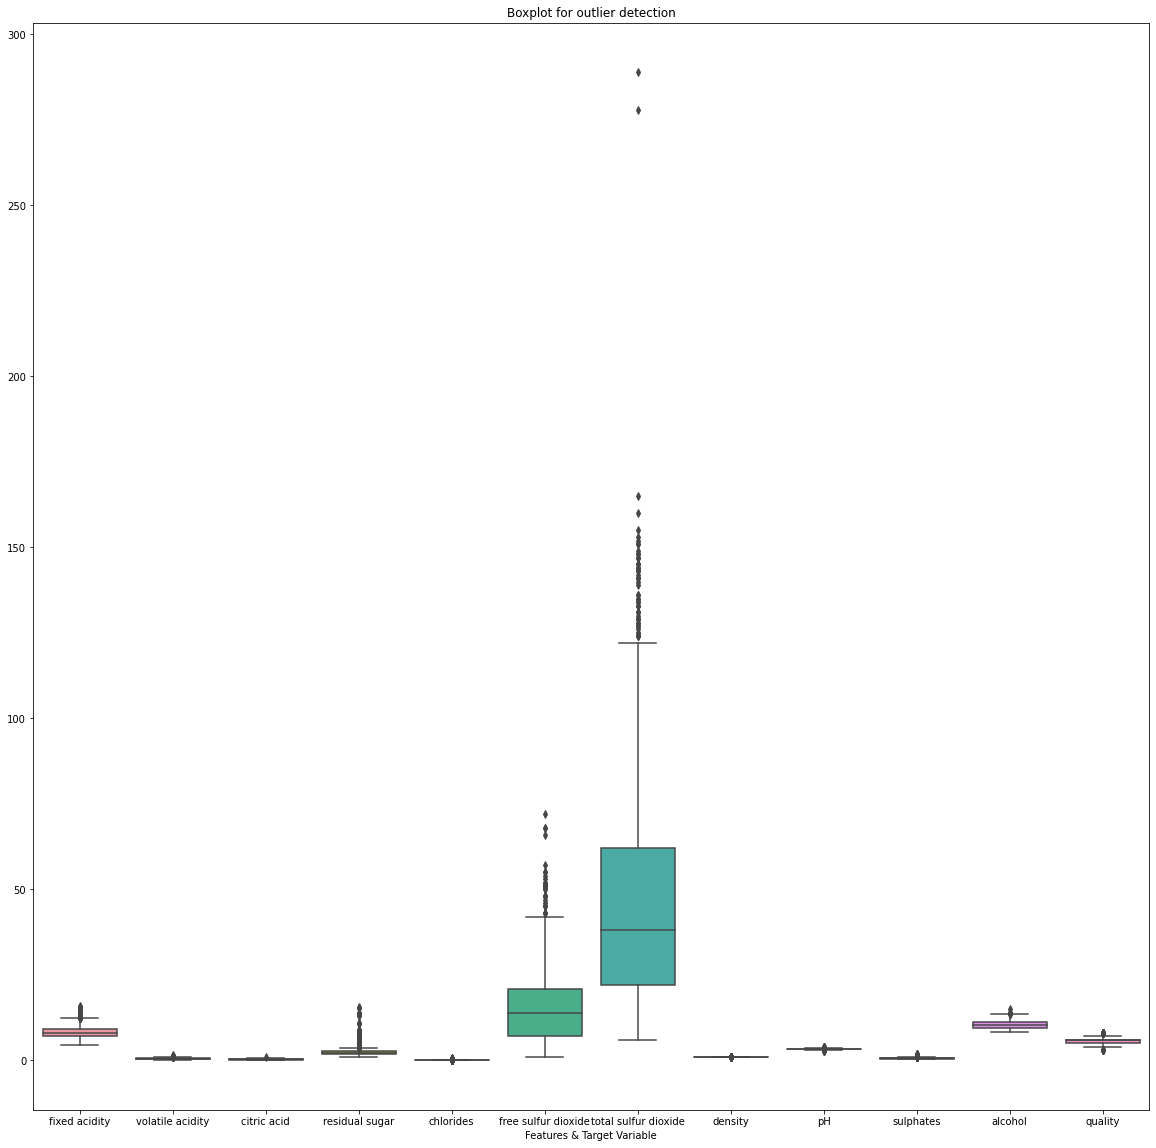

In [ ]:
#Data visualization for ouliers
plt.figure(figsize=(20,20))
sns.boxplot(data=wine_data)
plt.title("Boxplot for outlier detection")
plt.xlabel("Features & Target Variable")
#There are many outliers in the dataset but we are not removing the outliers beacuse we are looking for accuracy,not just some approximation i.e., it is possible that
#high quality wine having rare composition hence outliers are required.

In [ ]:
#Finding the out the value counts of wine quality on the basis of its scale
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

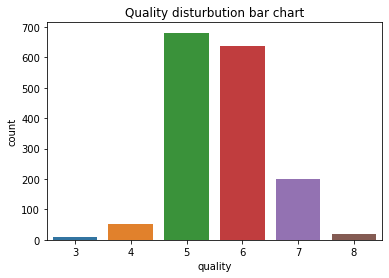

In [ ]:
#Visualization of tareget variable i.e., quality by the help of barplot
sns.countplot(data=wine_data,x='quality')
plt.title("Quality disturbution bar chart")
plt.show()

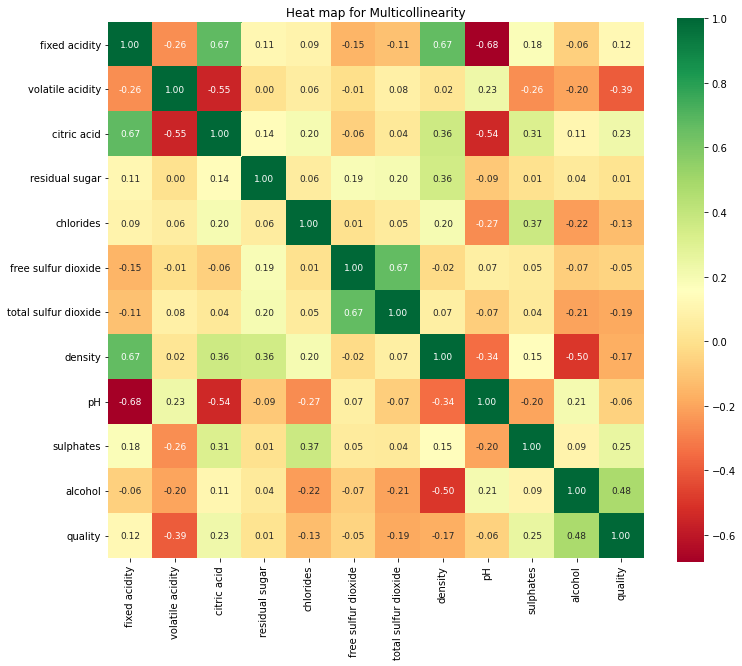

In [ ]:
#Visualizing the multicollinearity in the independent features
plt.figure(figsize=(12,10))
sns.heatmap(wine_data.corr(),annot=True,cmap='RdYlGn',cbar=True,square=True,annot_kws={'size':9},fmt="0.2f")
plt.title("Heat map for Multicollinearity")
plt.show()
#conclusion:There is high multicollinearity between the indepedent features but here we are concern about the prediction so we need not be much worried about it

In [ ]:
#Correleation of different independent features with the Target variable i.e., Quality
wine_data.corr()['quality'].sort_values()
#Conclusion:They are arranged in that order that feature which is having high positive correleation is near the quality
#Alcohol having highest positive correleation while volatile acidity having the leat negative one.

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

**Binarization of Data**

In [ ]:
#converting the quality into binary form i.e., quality greater than 7 as 1 else 0
wine_data['quality']=wine_data['quality'].apply(lambda x:1 if x>6 else 0)
wine_data['quality'].value_counts()
#performing the value count all the quality having less than 6 in scale i.e, 3,4,5,6 comes under 0 while 7 and 8 as 1

0    1382
1     217
Name: quality, dtype: int64

**Splitting the Dataset**

In [ ]:
#Data splitting is done
X=wine_data.drop('quality',axis=1)
Y=wine_data['quality']
#Conclusion:In X all the independent features are there while in Y, the target variable i.e., Quality is there



**Standization of Data**

In [ ]:
#Splitting is done followed by the stanadarization i.e., feature engineering of all feature except target variable.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=42)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
#conclusion: feature engineering is mandatory for distance based model i.e., LOGISTIC REGRESSION,KNN,SVM


In [ ]:
#Checking the shape of train & test dataset after splitting
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("Y_train: ",Y_train.shape)
print("Y_test: ",Y_test.shape)

X_train:  (1119, 11)
X_test:  (480, 11)
Y_train:  (1119,)
Y_test:  (480,)


**MODEL BUILDING**

**LOGISTIC REGRESSION(DISTANCE BASED MODEL)**

In [ ]:
#importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [ ]:
#Initilization of model
#fitting of train part in the model
log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [ ]:
#Predicting the value on the basis of X_test part
Y_train_pred=log_reg.predict(X_test)


In [ ]:
#Finding out the Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(Y_train_pred,Y_test)
print("Confusion matrix for Logistic Regression model:")
print(conf_matrix)
#Conclusion: TN=397,FN=18,TP=20,FP=47

Confusion matrix for Logistic Regression model:
[[395  47]
 [ 18  20]]


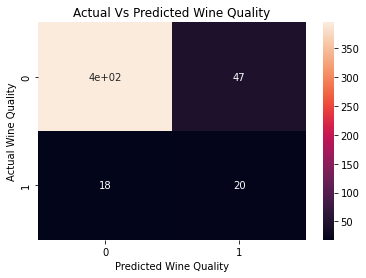

In [ ]:
#Creating the confusion matrix visually using heatmap
sns.heatmap(conf_matrix,annot=True)
plt.title("Actual Vs Predicted Wine Quality")
plt.xlabel('Predicted Wine Quality')
plt.ylabel("Actual Wine Quality")
plt.show()

In [ ]:
print("Accuracy for Logistic Regression: ", metrics.accuracy_score(Y_test,Y_train_pred))


Accuracy for Logistic Regression:  0.8645833333333334


In [ ]:
print("Precision for Logistic Regression: ", metrics.precision_score(Y_test,Y_train_pred))

Precision for Logistic Regression:  0.5263157894736842


In [ ]:
print("Recall for Logistic Regression : ", metrics.recall_score(Y_test,Y_train_pred))

Recall for Logistic Regression :  0.29850746268656714


In [ ]:
print("Classication report for Logistic Regression:")
print(metrics.classification_report(Y_test,Y_train_pred))
#Conclusion:f1 score is higher class 0 than for class 1 means that class 0 classifier works better hence having more support
#Its weighted average value id also good 85%
#Model accuracy is also good i.e., 86% means it predicts the qaulity of wine with 86% accuracy

Classication report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       413
           1       0.53      0.30      0.38        67

    accuracy                           0.86       480
   macro avg       0.71      0.63      0.65       480
weighted avg       0.84      0.86      0.85       480



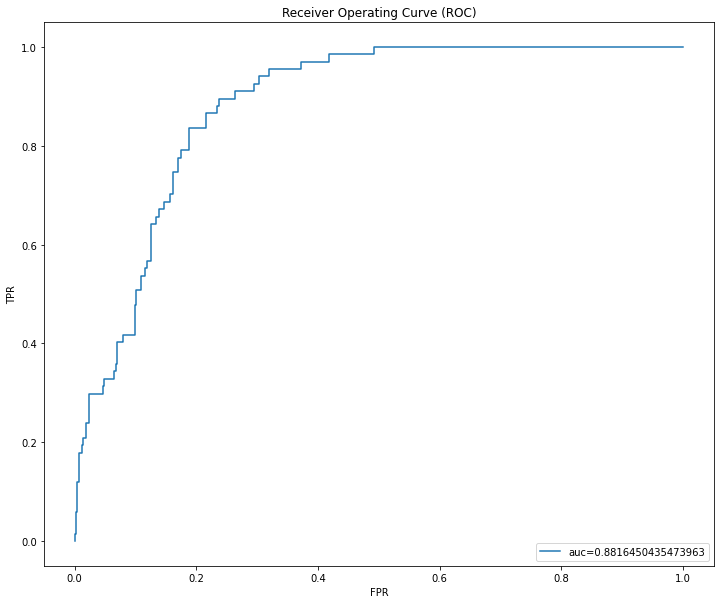

In [ ]:
# Predicting the area under the curve 
y_train_pred_proba=(log_reg.predict_proba(X_test)[::,1])
fpr,tpr,threshold=metrics.roc_curve(Y_test,y_train_pred_proba)
auc=metrics.roc_auc_score(Y_test,y_train_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Curve (ROC)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
auc=metrics.roc_auc_score(Y_test,y_train_pred_proba)
auc
#conclusion:The area under the curve and the shape of curve suggests that model is a good fit model

0.8816450435473963

In [ ]:
#CrossValScore calculates the mean of all the accuracies and cross validates our model
score=cross_val_score(log_reg,X_train,Y_train,cv=5)
score.mean()

0.8829356181934657

**2. DECISION TREE**

In [ ]:
# Importing Library,fitting the model and calculating accuracy
#Trying with max_depth 4
from sklearn.tree import DecisionTreeClassifier
model_dt4=DecisionTreeClassifier(random_state=42,max_depth=4)
model_dt4.fit(X_train,Y_train)
Y_train_pred4=model_dt4.predict(X_test)
print("Accuracy score for Decision Tree Model with depth 4: ",metrics.accuracy_score(Y_test,Y_train_pred4))

Accuracy score for Decision Tree Model with depth 4:  0.8666666666666667


In [ ]:
#With max depth 7
model_dt7=DecisionTreeClassifier(random_state=16,max_depth=7)
model_dt7.fit(X_train,Y_train)
Y_train_pred7=model_dt7.predict(X_test)
print("Accuracy score for the Decision Tree Model with depth 7: ",metrics.accuracy_score(Y_test,Y_train_pred7))

Accuracy score for the Decision Tree Model with depth 7:  0.8708333333333333


In [ ]:
#With max_depth =9
model_dt9=DecisionTreeClassifier(random_state=20,max_depth=9)
model_dt9.fit(X_train,Y_train)
Y_train_pred9=model_dt9.predict(X_test)
print("Accuracy with Decision Tree Model with depth 9: ",metrics.accuracy_score(Y_test,Y_train_pred9))
#Conclusion: almost all max_depth with gini gives the same accuracy so i m using 4 as max_depth for further

Accuracy with Decision Tree Model with depth 9:  0.86875


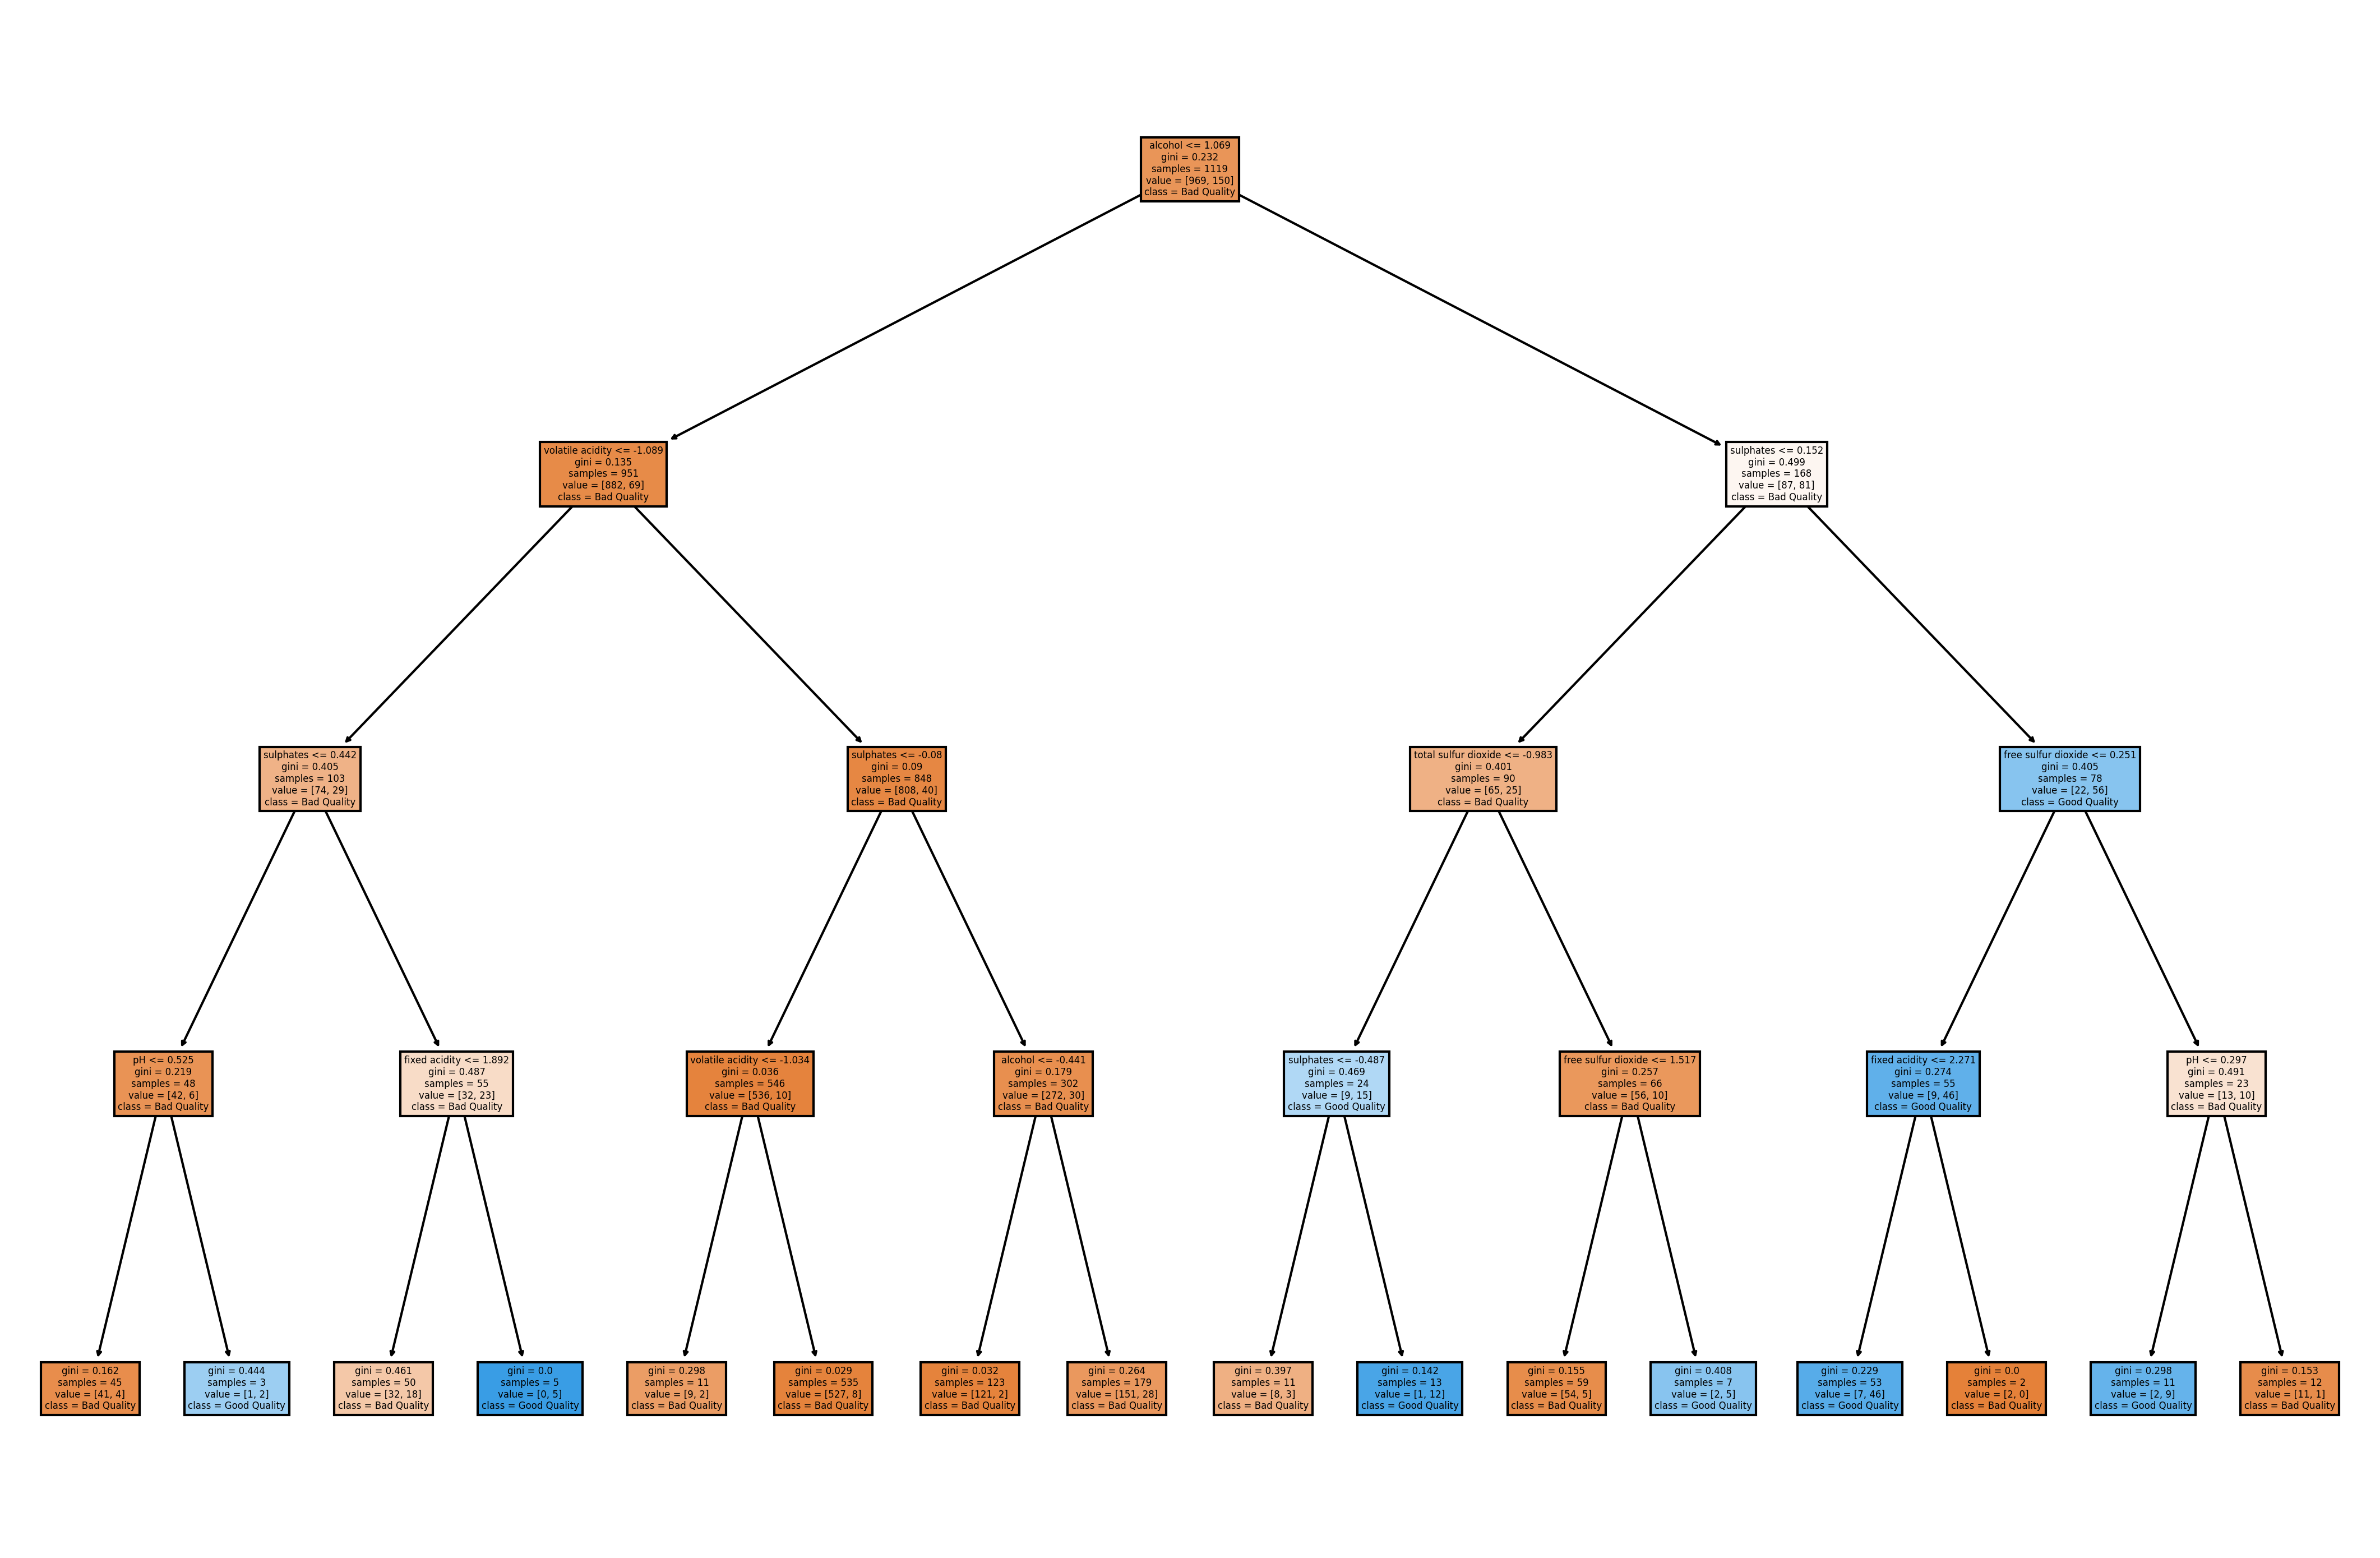

In [ ]:
#Decision Tree Visual representation with max_depth 4
from sklearn import tree
wine=pd.DataFrame(wine_data.drop(['quality'],axis=1))
column_names=list(wine)
fn=column_names
cn=['Bad Quality','Good Quality']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(18,12),dpi=300)
tree.plot_tree(model_dt4,
               feature_names=fn,
               class_names=cn,
               filled=True);
fig.savefig('DecisionTree.png')

In [ ]:
#Confusion_matrix
print("Confusion Matrix of Decision Tree")
print(metrics.confusion_matrix(Y_test,Y_train_pred4))
#Conclusion:TN 393,FN=44,TP=23,FP=20

Confusion Matrix of Decision Tree
[[393  20]
 [ 44  23]]


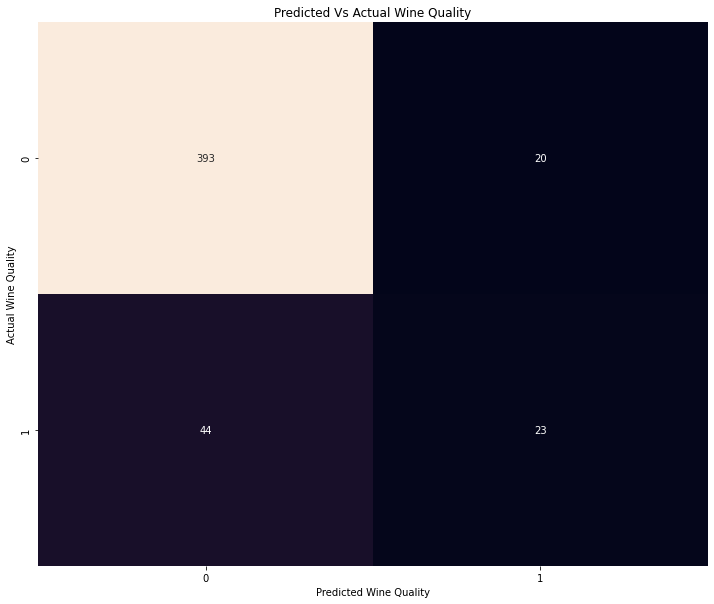

In [ ]:
plt.figure(figsize=(12,10))
conf_mat=metrics.confusion_matrix(Y_test,Y_train_pred4)
sns.heatmap(conf_mat,annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Wine Quality')
plt.ylabel('Actual Wine Quality')
plt.title('Predicted Vs Actual Wine Quality')
plt.show()

In [ ]:
print("Classification report:")
print(metrics.classification_report(Y_test,Y_train_pred7))
#conclusion:class 0 is better classifier with highest support and model accuracy and weighted average value is also good

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       413
           1       0.55      0.45      0.49        67

    accuracy                           0.87       480
   macro avg       0.73      0.69      0.71       480
weighted avg       0.86      0.87      0.87       480



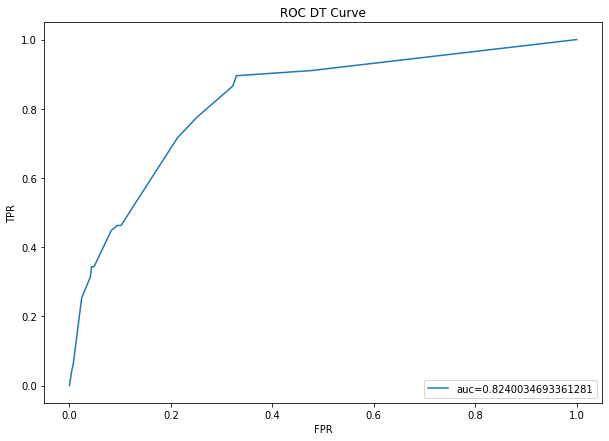

In [ ]:
y_train_pred_p=(model_dt4.predict_proba(X_test)[::,1])
fpr,tpr,threshold=metrics.roc_curve(Y_test,y_train_pred_p)
auc=metrics.roc_auc_score(Y_test,y_train_pred_p)
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.title("ROC DT Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
print("Area under curve for DT model: ")
print(metrics.roc_auc_score(Y_test,y_train_pred_p))
#conclusion:Haing good auc score of about 82%

Area under curve for DT model: 
0.8240034693361281


In [ ]:
#cross val score
print("Cross Val Score for DT model: ")
score1=cross_val_score(model_dt4,X_train,Y_train,cv=5)
score1.mean()

Cross Val Score for DT model: 


0.89096732863549

**3. Random Forest**

In [ ]:
!pip install ensemble

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing the library followed by fitting the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,random_state=5)
rf.fit(X_train,Y_train)
rf_pred=rf.predict(X_test)

In [ ]:
print("Accuracy Score for RF model without optimizing parameter")
print(metrics.accuracy_score(Y_test,rf_pred))

Accuracy Score for RF model without optimizing parameter
0.8916666666666667


Confusion matrix for RF Model: 
[[395  18]
 [ 34  33]]


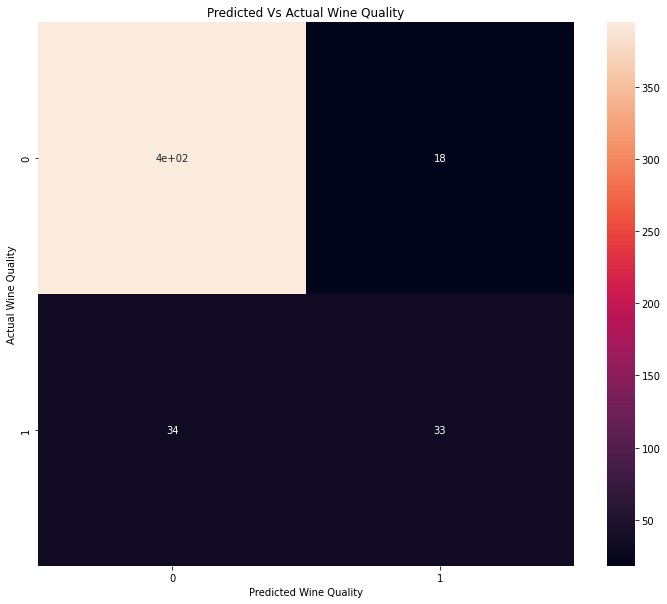

In [ ]:
print("Confusion matrix for RF Model: ")
print(metrics.confusion_matrix(Y_test,rf_pred))
plt.figure(figsize=(12,10))
conf_matrix=metrics.confusion_matrix(Y_test,rf_pred)
sns.heatmap(conf_matrix,annot=True)
plt.title("Predicted Vs Actual Wine Quality")
plt.xlabel("Predicted Wine Quality")
plt.ylabel("Actual Wine Quality")
plt.show()
#TN=395,FN=34,FP=18,TP=33

In [ ]:
print("Classification report for RF MOdel: ")
print(metrics.classification_report(Y_test,rf_pred))
#Model getting good accuracy and good average weighted score

Classification report for RF MOdel: 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       413
           1       0.65      0.49      0.56        67

    accuracy                           0.89       480
   macro avg       0.78      0.72      0.75       480
weighted avg       0.88      0.89      0.89       480



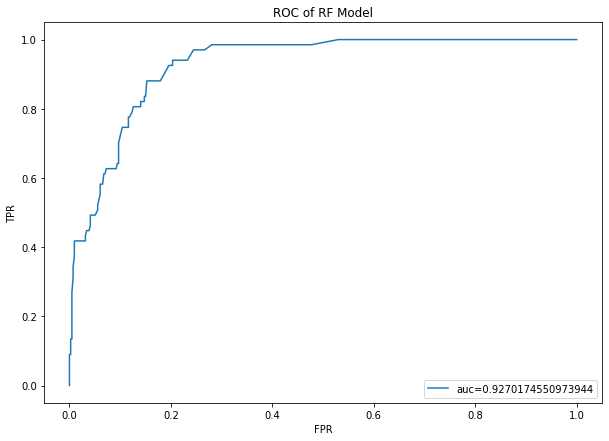

In [ ]:
y_rf_prob=(rf.predict_proba(X_test)[::,1])
fpr,tpr,threshold=metrics.roc_curve(Y_test,y_rf_prob)
auc=metrics.roc_auc_score(Y_test,y_rf_prob)
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.title("ROC of RF Model")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
print("Area under the Curve:")
print(metrics.roc_auc_score(Y_test,y_rf_prob))
#Shape is good and area under the curve is also good i.e., good fit model

Area under the Curve:
0.9270174550973944


In [ ]:
print("Cross Val Score for RF Model:")
score2=cross_val_score(rf,X_train,Y_train,cv=5)
score2.mean()

Cross Val Score for RF Model:


0.9106502242152466

In [ ]:
#Tuning of Hyperparameter with GRid Search CV
param_dist={'max_depth':[4,7,8,9],
            'max_features':['auto','sqrt','log2',None],
            'bootstrap':[True,False],
            'criterion':['gini','entropy']}
cv_rf=GridSearchCV(rf,cv=10,param_grid=param_dist,n_jobs=-1)
cv_rf.fit(X_train,Y_train)
print(cv_rf.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto'}


In [ ]:
rf.set_params(bootstrap=False,
              max_features='auto',
              criterion='entropy',
              max_depth=9)
rf.get_params
rf.fit(X_train,Y_train)
rf_pred_grid=rf.predict(X_test)
rf_pred_prob=rf.predict_proba(X_test)[::,1]
print("Accuracy score for RF model after tuning")
print(metrics.accuracy_score(Y_test,rf_pred_grid))

Accuracy score for RF model after tuning
0.8833333333333333


In [ ]:
print("Classification report for RF model after tuning")
print(metrics.classification_report(Y_test,rf_pred_grid))

Classification report for RF model after tuning
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       413
           1       0.60      0.49      0.54        67

    accuracy                           0.88       480
   macro avg       0.76      0.72      0.74       480
weighted avg       0.88      0.88      0.88       480



In [ ]:
print("Confusion Matrix after hyperparameter tuning")
print(metrics.confusion_matrix(Y_test,rf_pred_grid))
#TN=391,FN=34,TP=33,FP=22

Confusion Matrix after hyperparameter tuning
[[391  22]
 [ 34  33]]


In [ ]:
print("Cross Val Score for RF model after tuning")
print(cross_val_score(rf,X_train,Y_train,cv=10).mean())
print("Area Under the curve after tuning")
print(metrics.roc_auc_score(Y_test,rf_pred_prob))
#Before and After both having almost same accuracy, same auc score and same cross val score
#considering before one

Cross Val Score for RF model after tuning
0.9106499356499358
Area Under the curve after tuning
0.9218676592822811


**4.K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
pred_knn=knn.predict(X_test)
pred_knn_prob=knn.predict_proba(X_test)[::,1]
print("Accuracy score for KNN Model with K =7")
print(metrics.accuracy_score(Y_test,pred_knn))
#Getting same value for many others values of k also, but this value is selected because it is lower i.e., 7 and consistent for neighbor value also

Accuracy score for KNN Model with K =7
0.875


Confusion  matrix for KNN Model
[[390  23]
 [ 37  30]]


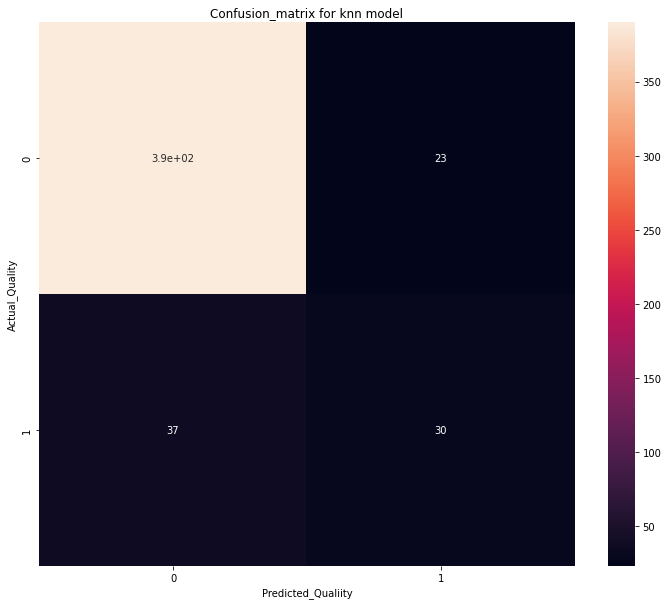

In [ ]:
con_knn=metrics.confusion_matrix(Y_test,pred_knn)
print("Confusion  matrix for KNN Model")
print(con_knn)
plt.figure(figsize=(12,10))
sns.heatmap(con_knn,annot=True)
plt.title("Confusion_matrix for knn model")
plt.xlabel("Predicted_Qualiity")
plt.ylabel("Actual_Quality")
plt.show()
#TN=390,FN=37,TP=30,FP=23

In [ ]:
print("Classification report for KNN model")
print(metrics.classification_report(Y_test,pred_knn))
print("Cross_Val_score for KNN Model",cross_val_score(knn,X_train,Y_train,cv=10).mean())

Classification report for KNN model
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       413
           1       0.57      0.45      0.50        67

    accuracy                           0.88       480
   macro avg       0.74      0.70      0.71       480
weighted avg       0.86      0.88      0.87       480

Cross_Val_score for KNN Model 0.8740186615186614


In [ ]:
print("Area under the curve for KNN model")
print(metrics.roc_auc_score(Y_test,pred_knn_prob))

Area under the curve for KNN model
0.8486502114126703


**5. Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svc=SVC(random_state=10)
svc.fit(X_train,Y_train)
svc_pred=svc.predict(X_test)
print("Accuracy Score for SVM Model before Specifying values")
print(metrics.accuracy_score(Y_test,svc_pred))

Accuracy Score for SVM Model before Specifying values
0.88125


In [ ]:
#Conidering the best fit parametrs
svc=SVC(C=1,kernel='rbf',gamma=0.1,random_state=51)#C value is higher while gamma value is lower
svc.fit(X_train,Y_train)
pred_svc=svc.predict(X_test)

print("Accuracy score for SVM model After specifying parameter")

print(metrics.accuracy_score(Y_test,pred_svc))
print("Area under the curve for SVM Model")
print(metrics.roc_auc_score(Y_test,pred_svc))

print("CLassification report for SVM model")
print(metrics.classification_report(Y_test,pred_svc))


Accuracy score for SVM model After specifying parameter
0.8833333333333333
Area under the curve for SVM Model
0.6446098803801814
CLassification report for SVM model
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       413
           1       0.68      0.31      0.43        67

    accuracy                           0.88       480
   macro avg       0.79      0.64      0.68       480
weighted avg       0.87      0.88      0.86       480



Confusion matrix for SVM model
[[403  10]
 [ 46  21]]


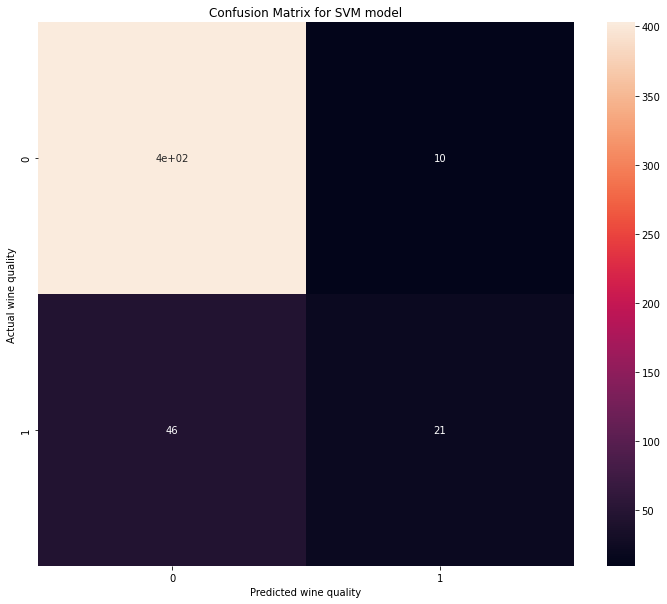

In [ ]:
conf_svm=metrics.confusion_matrix(Y_test,pred_svc)
print("Confusion matrix for SVM model")
print(conf_svm)
plt.figure(figsize=(12,10))
sns.heatmap(conf_svm,annot=True)
plt.title("Confusion Matrix for SVM model")
plt.xlabel("Predicted wine quality")
plt.ylabel("Actual wine quality")
plt.show()
#TN=403,FN=46,TP=21,FP=10

In [ ]:
print("Cross VAl Score for SVM Model: ")
print(cross_val_score(svc,X_train,Y_train,cv=10).mean())

Cross VAl Score for SVM Model: 
0.8856177606177604


**Summarizing all the accuracy score and cross val score in the table**

In [ ]:
df=pd.DataFrame({'Model_Name':['Logistic Regression','Decision Tree','Random Forest','KNN','SVM'],
                 'Accuracy(in%)':[86,87,89,88,88],
                 'Cross_Val_Score':[88.2,89.2,91,87.4,88.5]}
                )
df

,Model_Name,Accuracy(in%),Cross_Val_Score
0,Logistic Regression,86,88.2
1,Decision Tree,87,89.2
2,Random Forest,89,91.0
3,KNN,88,87.4
4,SVM,88,88.5


**Comparison with Visualization**

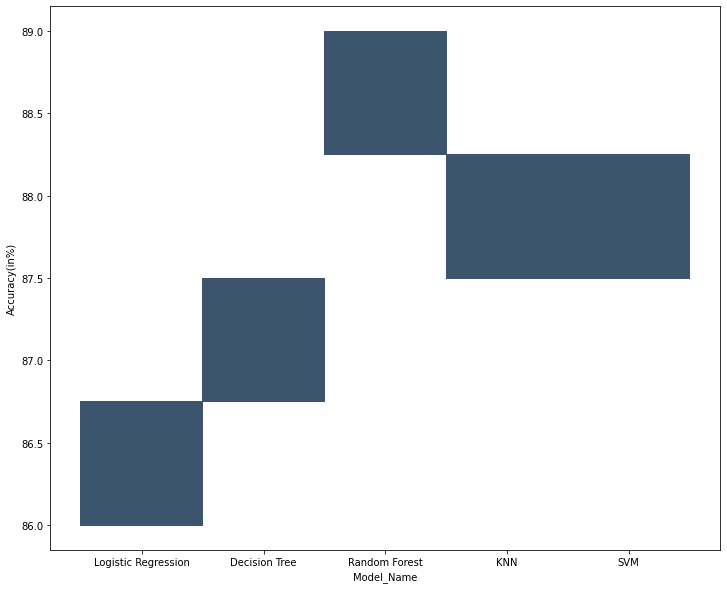

In [ ]:
#Plotting the graph betwwn models with respect to their accuracy(in%)
plt.figure(figsize=(12,10))
sns.histplot(data=df,x='Model_Name',y='Accuracy(in%)')
plt.show()

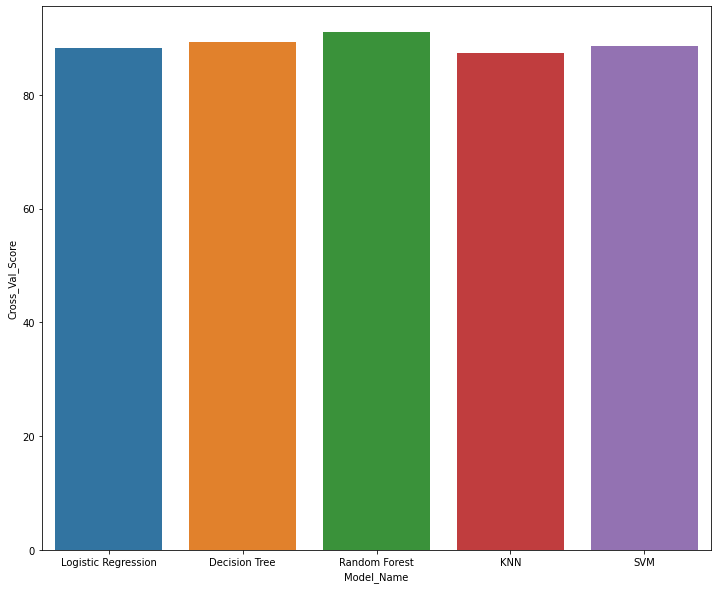

In [ ]:
#Graph between model names and cross val score
plt.figure(figsize=(12,10))
sns.barplot(data=df,x='Model_Name',y='Cross_Val_Score')
plt.show()

**Prediction or testing with dataset**

In [ ]:
input_data=[11,0.28,0.56,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]
input_data_as_numpy=np.asarray(input_data)
input_data_reshape=input_data_as_numpy.reshape(1,-1)
prediction=rf.predict(input_data_reshape)
print(prediction)
if prediction==1:
  print("It is a GOOD QUALITY wine")
else:
  print("It is a BAD QUALITY wine")

[0]
It is a BAD QUALITY wine


**Summary Box**

1.From all the models used above throwing good accuracy but i prefer the Random Forest Method for making prrediction about wine quality beacuse it is having good and highest accuarcy and cross val score among all.

2.No Treatement of outliers and miscollinearity is done for this dataset because it is has to be used for prediction.

3.Binary Classification is done for prediction if we wants output as Good or Bad,furter on the basis of scale model is also built.

4.In Binary classification all models throwing good accuracies and cross val score.

5.Naive Bayes(NB) is not used beacuse it is only applied when multicollinearity between independent features is not there but hence it exits for current dataset so i am not going to apply that model.
